In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

df_data = pd.read_csv("data/Speed Dating Data.csv")
df_data.shape

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

In [279]:
cols = ['iid', 'pid', 'gender', 'match',
        # about for me.
        'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
#         'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
#         'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
        'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1',
        'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
        
        # about for partner
        'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
        'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o'
#         'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1',
       ]

df_selected = df_data.loc[:, cols]

# Separate dataframe into male and female.
df_male = df_selected.loc[ df_selected['gender'] == 0 ]
df_female = df_selected.loc[ df_selected['gender'] == 1 ]

# Select columns we want from female's dataframe.
attr3 = ['iid', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1',  'amb3_1']
df_female = df_female.loc[:, attr3]

# Drop duplicated Index from female's dataframe.
df_female.drop_duplicates('iid', inplace=True)

# Let's make dataframe for matching. (empty yet)
df_match = pd.DataFrame( data = None, columns = cols + ['attr3_1_o', 'sinc3_1_o', 'fun3_1_o', 'intel3_1_o',  'amb3_1_o'] )
index = 0

# Let's fill each rows of dataframe for matching.
for m_index, m_row in df_male.iterrows() :
    pid = m_row['pid']
    
#     Find partner id in female group corresponding to each row.
    for f_index, f_row in df_female.iterrows() :
        if pid == f_row['iid'] :
            
#           Extract values from each row of dataframes.
            values = list(m_row.values) + list(f_row.values[1:])
    
#           Fill a row of match dataframe
            df_match.loc[index] = values
            index += 1
#             print(index)
            
            break
#     if index ==  :
#         break
    
df_match.head()



,iid,pid,gender,match,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,...,fun_o,amb_o,shar_o,like_o,prob_o,attr3_1_o,sinc3_1_o,fun3_1_o,intel3_1_o,amb3_1_o
0,1.0,11.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,...,8.0,8.0,6.0,7.0,4.0,8.0,9.0,7.0,8.0,5.0
1,1.0,12.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,...,7.0,7.0,5.0,8.0,4.0,9.0,9.0,9.0,10.0,9.0
2,1.0,13.0,0.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,...,10.0,10.0,10.0,10.0,10.0,4.0,7.0,8.0,8.0,3.0
3,1.0,14.0,0.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,...,8.0,9.0,8.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0
4,1.0,15.0,0.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,...,6.0,9.0,7.0,8.0,6.0,7.0,7.0,7.0,9.0,9.0


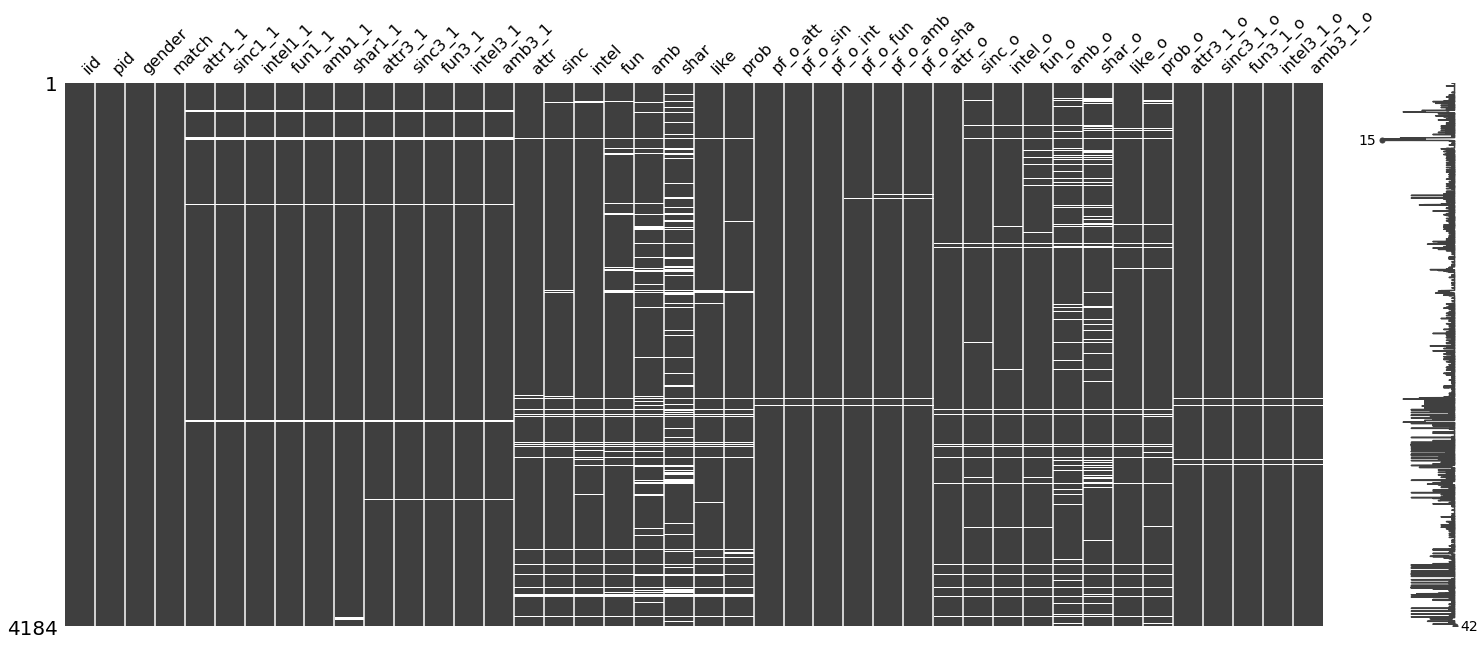

In [280]:
msno.matrix(df_match)